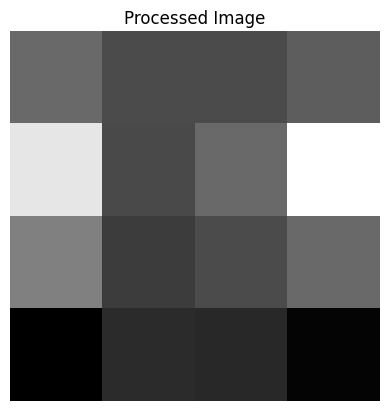

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
def preprocess_image(image_path, size):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize(size, Image.Resampling.LANCZOS)  # Resize to 2^n x 2^n
    image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    return image

# Provide your image path and desired size (must be a power of 2)
image_path = r'D:\6m_NIC\images\trees.jpg'  # Ensure this points to a valid image file
size = (4, 4)  # Example: Resize to 4x4 for simplicity

# Check if the file exists
import os
if not os.path.isfile(image_path):
    raise FileNotFoundError(f"The file at {image_path} does not exist.")

# Process the image
image = preprocess_image(image_path, size)

# Display the image using matplotlib
plt.imshow(image, cmap='gray')  # Use cmap='gray' for grayscale images
plt.title('Processed Image')
plt.axis('off')  # Hide axis
plt.show()


In [2]:
from PIL import Image
import numpy as np

def load_image(image_path, size=(28, 28)):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize(size)  # Resize image to 28x28
    image_np = np.array(image, dtype='float32') / 255.0  # Normalize pixel values
    return image_np

image_path = r'D:\6m_NIC\images\trees.jpg'
image = load_image(image_path)


In [3]:
flattened_image = image.flatten()
theta = np.arccos(np.sqrt(flattened_image))


In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

n = int(np.log2(image.size))  # Number of qubits for position (n) and 1 qubit for grayscale
qr = QuantumRegister(n + 1)  # Quantum register with n+1 qubits
cr = ClassicalRegister(n + 1)  # Classical register for measurement
qc = QuantumCircuit(qr, cr)


In [5]:
for i in range(n):
    qc.h(qr[i])  # Apply Hadamard gates to create superposition

for i in range(image.size):
    binary_string = format(i, '0' + str(n) + 'b')
    for idx, bit in enumerate(binary_string):
        if bit == '0':
            qc.x(qr[idx])  # Apply X gates based on binary representation

    qc.mcry(theta[i], qr[:n], qr[n])  # Multi-controlled rotation using angle theta[i]
    for idx, bit in enumerate(binary_string):
        if bit == '0':
            qc.x(qr[idx])


       ┌───┐┌───┐                                           ┌───┐   ┌───┐ »
 q2_0: ┤ H ├┤ X ├──■─────────────────────────────────■──────┤ X ├───┤ X ├─»
       ├───┤├───┤  │                                 │      ├───┤   ├───┤ »
 q2_1: ┤ H ├┤ X ├──■─────────────────────────────────■──────┤ X ├───┤ X ├─»
       ├───┤├───┤  │                                 │      ├───┤   ├───┤ »
 q2_2: ┤ H ├┤ X ├──■─────────────────────────────────■──────┤ X ├───┤ X ├─»
       ├───┤├───┤  │              ┌────┐             │      └───┘   ├───┴┐»
 q2_3: ┤ H ├┤ X ├──■──────────────┤1   ├─────────────■──────────────┤1   ├»
       ├───┤├───┤  │              │    │             │              │    │»
 q2_4: ┤ H ├┤ X ├──■──────────────┤2   ├─────────────■──────────────┤2   ├»
       ├───┤├───┤┌─┴──┐           │    │           ┌─┴──┐           │    │»
 q2_5: ┤ H ├┤ X ├┤1   ├───────────■    ├───────────┤1   ├───────────■    ├»
       ├───┤├───┤│    │           │    │           │    │           │    │»
 q2_6: ┤ H ├

C:\Users\DELL\AppData\Local\Temp\ipykernel_10976\25731400.py:7: DeprecationWarning: The function ``qiskit.compiler.assembler.assemble()`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  qobj = assemble(qc_compiled)  # Assemble the circuit into a Qobj
C:\Users\DELL\AppData\Local\Temp\ipykernel_10976\25731400.py:8: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()  # Run the simulation


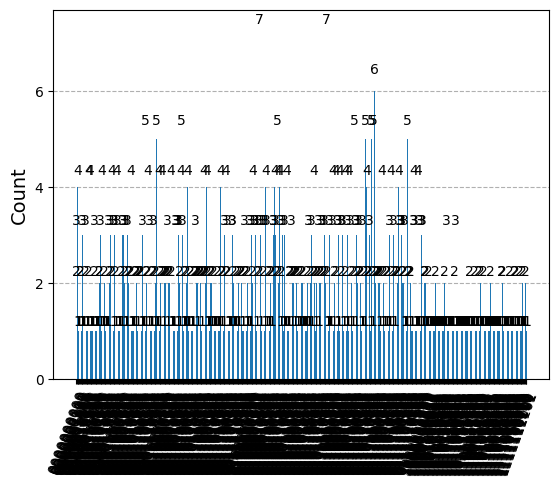

In [6]:
qc.measure(qr, cr)  # Measure the qubits

print(qc)  # Display the quantum circuit

simulator = Aer.get_backend('qasm_simulator')  # Use Aer's qasm_simulator
qc_compiled = transpile(qc, simulator)  # Transpile the circuit for the simulator
qobj = assemble(qc_compiled)  # Assemble the circuit into a Qobj
result = simulator.run(qobj).result()  # Run the simulation
counts = result.get_counts()  # Get the measurement results

plot_histogram(counts)  # Plot the histogram of the result
